# Implementing SIFT (Scale-Invariant Feature Transform) for Image Feature Matching

210174X

Gallella M.M.H.H.B

ENTC


## Scale-Invariant Feature Transform (SIFT)

### Introduction
The **Scale-Invariant Feature Transform (SIFT)** is a powerful technique for extracting distinctive and robust features from images. Developed by David G. Lowe, SIFT provides a foundation for various computer vision tasks, including object recognition, image stitching, and 3D reconstruction.

### Key Stages of SIFT
1. **Scale-Space Extrema Detection**:
   - Identifies potential interest points by analyzing the difference of Gaussian (DoG) function across multiple scales.
   - These extrema correspond to keypoints that are invariant to changes in scale.

2. **Keypoint Localization**:
   - Refines the detected keypoints by eliminating unstable ones.
   - Keypoints are selected based on their stability under scale and rotation changes.

3. **Orientation Assignment**:
   - Assigns an orientation to each keypoint based on local image gradients.
   - This step ensures invariance to image rotation.

4. **Keypoint Descriptor**:
   - Constructs a descriptor for each keypoint using gradient histograms.
   - The descriptor captures local shape information and is robust to illumination variations.

### Applications
- **Object Recognition**:
  - SIFT features enable reliable matching between different views of an object.
  - The method involves nearest-neighbor search and geometric verification.
  - SIFT is effective in cluttered and occluded environments.

- **3D Reconstruction**:
  - SIFT keypoints aid in reconstructing 3D scenes from multiple images.
  - They provide correspondences for structure-from-motion algorithms.

- **Motion Tracking and Robot Localization**:
  - SIFT features are used for tracking moving objects and localizing robots.


SIFT remains a fundamental tool in computer vision due to its robustness and invariance properties. Its distinctive features allow for correct matches even in challenging scenarios.

# Import required packages ;

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Import and Display the images with their dimensions;

Number of keypoints in first image: 1107
Number of keypoints in second image: 303
Image dimensions: (512, 512, 3)


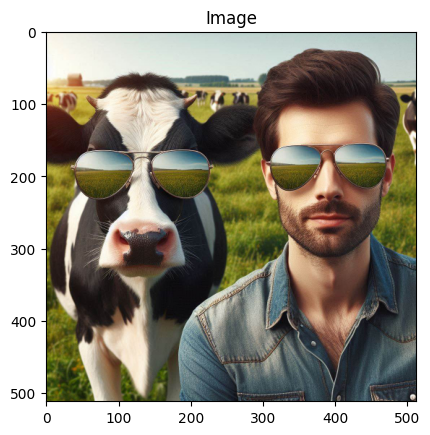

Template dimensions: (300, 300, 3)


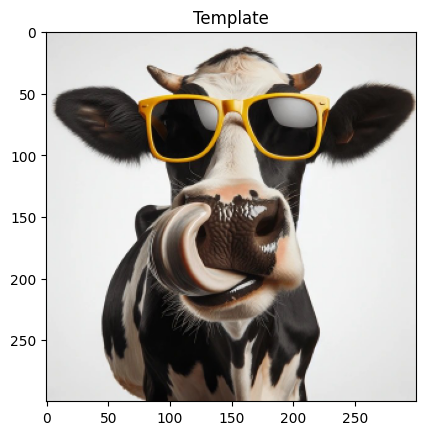

In [5]:
image = cv.imread('Cow_Thief.jpeg', cv.IMREAD_REDUCED_COLOR_2)  # Read the image file 'store_shelf.png' and reduce its color
assert image is not None  # Check if the image was successfully loaded

template = cv.imread('My_Stolen_Cow.jpg', cv.IMREAD_REDUCED_COLOR_2)  # Read the image file 'oat_crunch.jpg' and reduce its color
assert template is not None  # Check if the template image was successfully loaded

sift = cv.SIFT_create()  # Create a SIFT object for keypoint detection and description

kp1, des1 = sift.detectAndCompute(image, None)  # Detect keypoints and compute descriptors for the image
kp2, des2 = sift.detectAndCompute(template, None)  # Detect keypoints and compute descriptors for the template image

print(f"Number of keypoints in first image: {len(kp1)}")  # Print the number of keypoints detected in the image
print(f"Number of keypoints in second image: {len(kp2)}")  # Print the number of keypoints detected in the template image

print("Image dimensions:", image.shape)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Image')
plt.show()

print("Template dimensions:", template.shape)
plt.imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB))
plt.title('Template')
plt.show()


# Using FLANN-based Matcher for Efficient Feature Matching in OpenCV

The provided code demonstrates the use of the Fast Library for Approximate Nearest Neighbors (FLANN) for feature matching in images using OpenCV. FLANN is an efficient algorithm designed for matching high-dimensional data. In the code, FLANN_INDEX_KDTREE is specified as the algorithm, with index and search parameters set for optimal performance. The matcher is created and used to find matches between descriptors from two images. A ratio test based on Lowe's paper is applied to filter out poor matches, ensuring only the best matches are considered. The matches are then drawn on the image with specified drawing parameters, and the result is displayed with the title "The Cow Thief and the Stolen Cow."

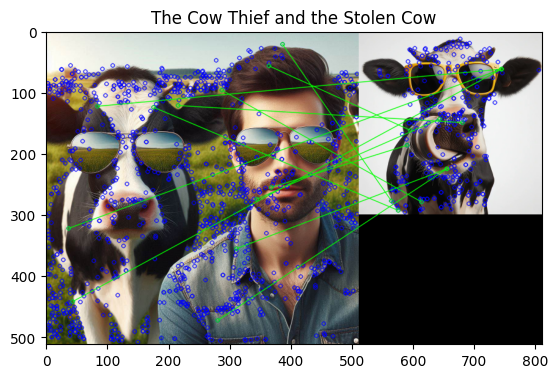

In [4]:
FLAAN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLAAN_INDEX_KDTREE, trees=5)  # Set index parameters for FLANN matcher
search_params = dict(checks=50)  # Set search parameters for FLANN matcher
flann = cv.FlannBasedMatcher(index_params, search_params)  # Create FLANN matcher object
matches = flann.knnMatch(des1, des2, k=2)  # Perform FLANN matching

# Need to draw only good matches, so create a mask
matchesMask = [[0, 0] for i in range(len(matches))]  # Initialize matches mask

# Ratio test as per Lowe's paper
for i, (m, n) in enumerate(matches):
    if m.distance < 0.7 * n.distance:
        matchesMask[i] = [1, 0]  # Set mask value to indicate a good match

dra_params = dict(matchColor=(0, 255, 0),
                  singlePointColor=(255, 0, 0),
                  matchesMask=matchesMask,
                  flags=cv.DrawMatchesFlags_DEFAULT)  # Set parameters for drawing matches

img3 = cv.drawMatchesKnn(image, kp1, template, kp2, matches, None, **dra_params)  # Draw matches on image
plt.imshow(cv.cvtColor(img3, cv.COLOR_BGR2RGB))  # Display the image with matches
plt.title('The Cow Thief and the Stolen Cow')  # Set the title for the image
plt.show()  # Show the image with matches

Therefore, the results are unfavorable. It is impossible to recognize this type of fine-grained re-ID tasks with this approach.

# Example of the store;

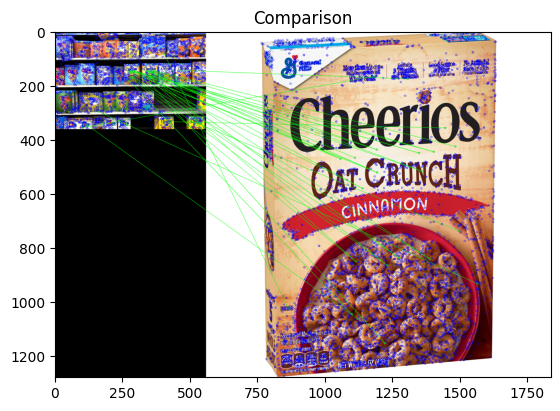

In [7]:
image = cv.imread('store_shelf.png', cv.IMREAD_REDUCED_COLOR_2)  # Read the image file 'store_shelf.png' and reduce its color
assert image is not None  # Check if the image was successfully loaded

template = cv.imread('oat_crunch.jpg', cv.IMREAD_REDUCED_COLOR_2)  # Read the image file 'oat_crunch.jpg' and reduce its color
assert template is not None  # Check if the template image was successfully loaded

sift = cv.SIFT_create()  # Create a SIFT object for keypoint detection and description

kp1, des1 = sift.detectAndCompute(image, None)  # Detect keypoints and compute descriptors for the image
kp2, des2 = sift.detectAndCompute(template, None)  # Detect keypoints and compute descriptors for the template image


FLAAN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLAAN_INDEX_KDTREE, trees=5)  # Set index parameters for FLANN matcher
search_params = dict(checks=50)  # Set search parameters for FLANN matcher
flann = cv.FlannBasedMatcher(index_params, search_params)  # Create FLANN matcher object
matches = flann.knnMatch(des1, des2, k=2)  # Perform FLANN matching

# Need to draw only good matches, so create a mask
matchesMask = [[0, 0] for i in range(len(matches))]  # Initialize matches mask

# Ratio test as per Lowe's paper
for i, (m, n) in enumerate(matches):
    if m.distance < 0.7 * n.distance:
        matchesMask[i] = [1, 0]  # Set mask value to indicate a good match

dra_params = dict(matchColor=(0, 255, 0),
                  singlePointColor=(255, 0, 0),
                  matchesMask=matchesMask,
                  flags=cv.DrawMatchesFlags_DEFAULT)  # Set parameters for drawing matches

img3 = cv.drawMatchesKnn(image, kp1, template, kp2, matches, None, **dra_params)  # Draw matches on image
plt.imshow(cv.cvtColor(img3, cv.COLOR_BGR2RGB))  # Display the image with matches
plt.title('Comparison')  # Set the title for the image
plt.show()  # Show the image with matches
